# TCSion Internship

# RIO-125: HR Salary Dashboard- Train the dataset and predict the salary

In [1]:
# We can explore the possibility in predicting income level based on the individual’s personal information.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the datset to python environment
data = pd.read_csv('C:/Users/hp/Downloads/salarydata.csv')

In [4]:
# displaying first 5 rows
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
#The unique values and its count of each column.

In [7]:
for i in data.columns:
  print(data[i].value_counts())
  print('---------------------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
---------------------------------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---------------------------------------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
---------------------------------------------
9     10501
10     7291
13     5355
14     1723
11     1382
7      117

In [8]:
# Replacing special characters with nan
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [9]:
data.isin(['?']).sum(axis=0) # finding special characters

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [10]:
data.isna().sum()   ##checking for missing(null) values

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
print(f"We have {data.duplicated().sum()} duplicate values")   ## checking for duplicate entries

We have 3465 duplicate values


In [12]:
data= data.drop_duplicates()   ## duplicate values are dropped

In [13]:
data.describe()   ## statistical summary

,age,education-num,capital-gain,capital-loss,hours-per-week
count,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000
mean,39.251340,10.102695,1197.802206,97.175179,40.637820
std,13.687157,2.645194,7778.225220,424.008232,12.735418
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.describe(include='O')          ## summary of catagorical columns

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,27464,29096,29096,27457,29096,29096,29096,28516,29096
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19621,8886,13249,3885,11506,24438,19246,25721,21886


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

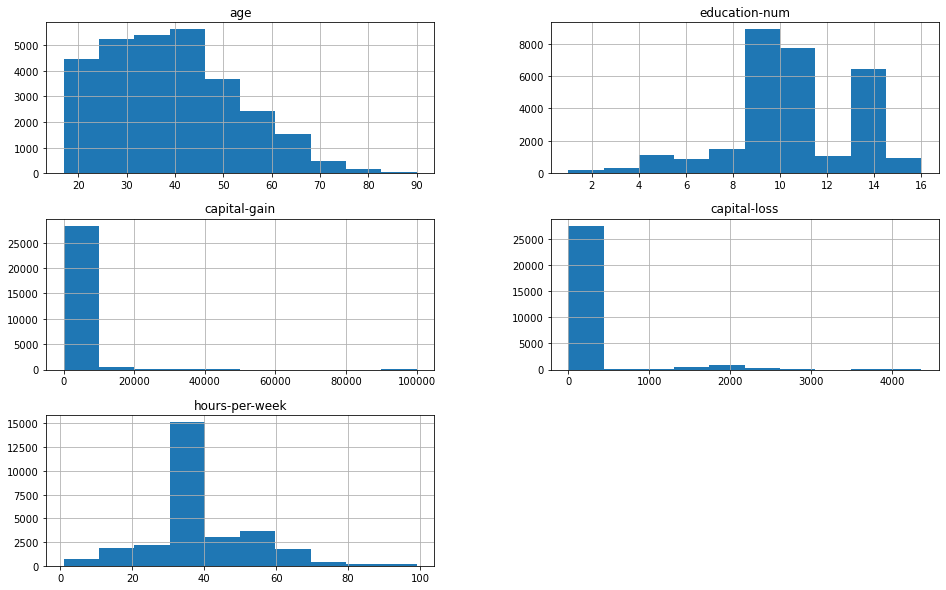

In [15]:
data.hist(figsize=(16,10))
plt.show

<AxesSubplot:>

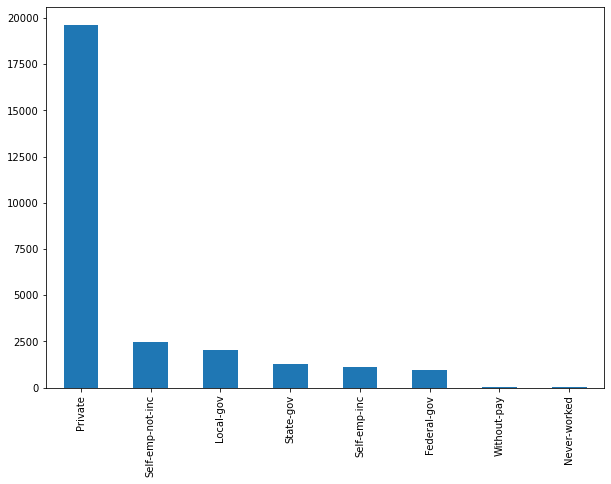

In [16]:
plt.figure(figsize=(10,7))
data['workclass'].value_counts().plot(kind='bar')

In [17]:
data['salary'].value_counts()

<=50K    21886
>50K      7210
Name: salary, dtype: int64

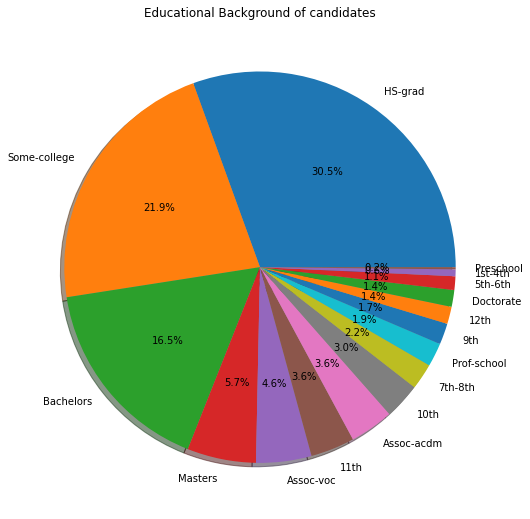

In [18]:
labels=list(dict(data['education'].value_counts()))
d1=list(data['education'].value_counts())
plt.figure(figsize=(16,9))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()

In [19]:
# Relation between different numerical columns and target column(Salary)

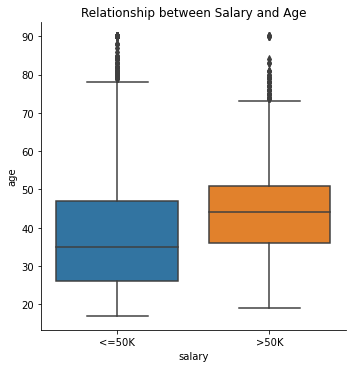

In [20]:
sns.catplot(data=data, x='salary', y='age', kind= 'box')
plt.title('Relationship between Salary and Age')
plt.show()

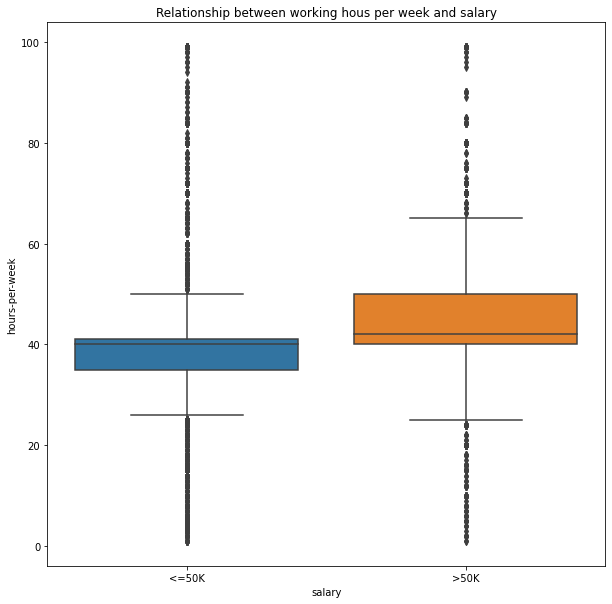

In [21]:
fig = plt.figure(figsize=(10,10)) 
plt.title('Relationship between working hous per week and salary')
sns.boxplot(x="salary", y="hours-per-week", data=data)
plt.show()

In [22]:
# Relation between different catogorical columns and target column(Salary)

In [23]:
catag_cols = data.select_dtypes('object')

In [24]:
import warnings
warnings.filterwarnings('ignore')

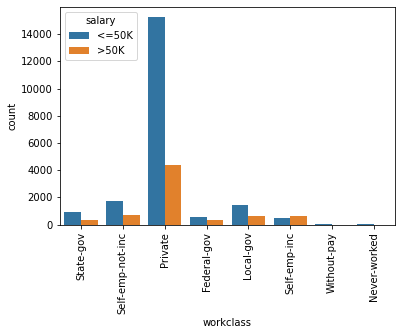

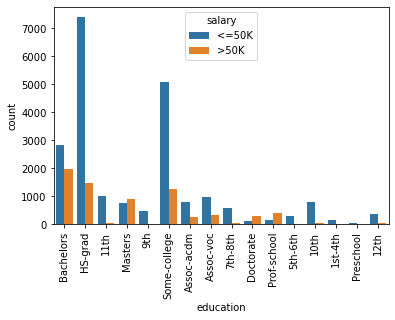

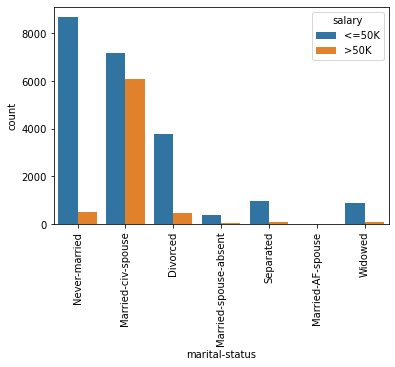

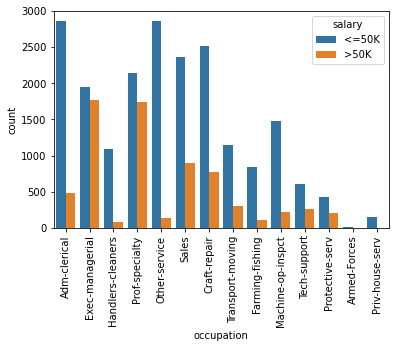

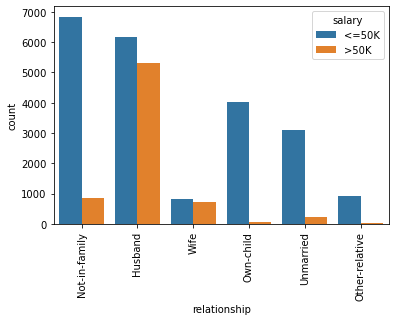

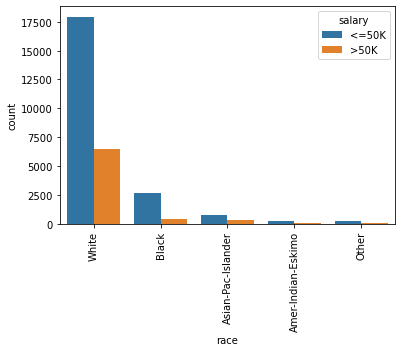

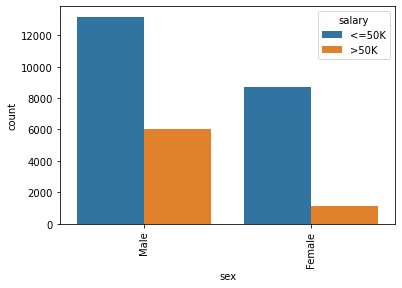

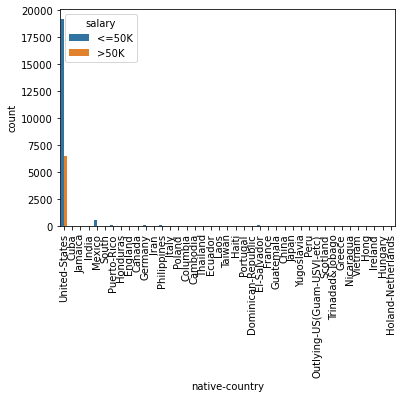

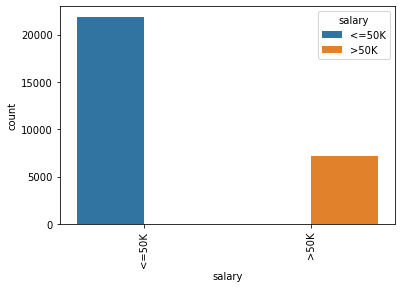

In [25]:
for col in (catag_cols):
    sns.countplot(data[col], hue=data["salary"])
    plt.xticks(rotation=90)
    plt.show()

In [26]:
data.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [27]:
data.groupby('sex')['salary'].mean().sort_values(ascending=False)

sex
Male      0.314767
Female    0.116954
Name: salary, dtype: float64

In [28]:
data.groupby('workclass')['salary'].mean().sort_values(ascending= False)

workclass
Self-emp-inc        0.554537
Federal-gov         0.382664
Local-gov           0.294608
Self-emp-not-inc    0.286292
State-gov           0.273585
Private             0.224097
Never-worked        0.000000
Without-pay         0.000000
Name: salary, dtype: float64

# Preprocessing


In [29]:
data.isna().sum()   ##checking for missing(null) values

age                  0
workclass         1632
education            0
education-num        0
marital-status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     580
salary               0
dtype: int64

In [30]:
data['workclass'].value_counts()

Private             19621
Self-emp-not-inc     2473
Local-gov            2040
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [31]:
data['occupation'].value_counts()

Prof-specialty       3885
Exec-managerial      3719
Adm-clerical         3340
Craft-repair         3298
Sales                3270
Other-service        2996
Machine-op-inspct    1702
Transport-moving     1445
Handlers-cleaners    1179
Farming-fishing       962
Tech-support          874
Protective-serv       631
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [32]:
data['native-country'].value_counts()

United-States                 25721
Mexico                          633
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [33]:
# As the missing value fall into the categorical features, we will use mode() method to fill the missing value

In [34]:
data = data.fillna(data.mode().iloc[0])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29096 non-null  int64 
 1   workclass       29096 non-null  object
 2   education       29096 non-null  object
 3   education-num   29096 non-null  int64 
 4   marital-status  29096 non-null  object
 5   occupation      29096 non-null  object
 6   relationship    29096 non-null  object
 7   race            29096 non-null  object
 8   sex             29096 non-null  object
 9   capital-gain    29096 non-null  int64 
 10  capital-loss    29096 non-null  int64 
 11  hours-per-week  29096 non-null  int64 
 12  native-country  29096 non-null  object
 13  salary          29096 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.3+ MB
None


In [35]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [36]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [37]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [38]:
data.drop(['education-num','capital-gain','capital-loss'],axis=1,inplace=True)

In [39]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [40]:
# Outlier detection and removal

<AxesSubplot:xlabel='hours-per-week'>

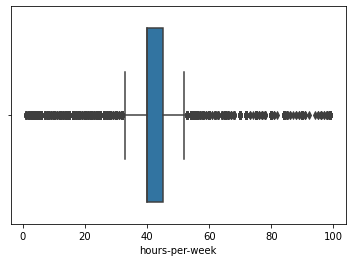

In [41]:
sns.boxplot(data['hours-per-week'],orient='h')

In [42]:
print(data['hours-per-week'].quantile(0.10))
print(data['hours-per-week'].quantile(0.90))

24.0
55.0


<AxesSubplot:xlabel='hours-per-week'>

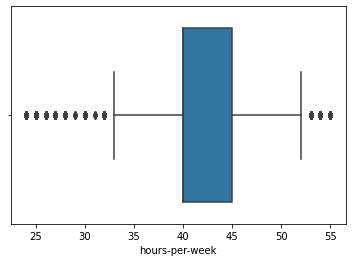

In [43]:
data["hours-per-week"] = np.where(data["hours-per-week"] <24.0, 24.0,data['hours-per-week'])
data["hours-per-week"] = np.where(data["hours-per-week"] >55.0, 55.0,data['hours-per-week'])
sns.boxplot(data['hours-per-week'],orient='h')

<AxesSubplot:xlabel='age'>

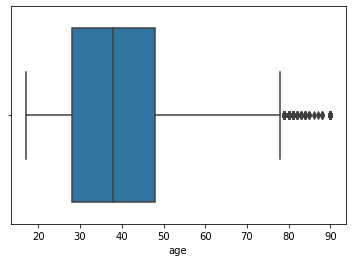

In [44]:
sns.boxplot(data['age'],orient='h')

In [45]:
print(data['age'].quantile(0.10))
print(data['age'].quantile(0.90))

22.0
58.0


In [46]:
data["age"] = np.where(data["age"] <22.0, 22.0,data['age'])
data["age"] = np.where(data["age"] >58.0, 58.0,data['age'])

<AxesSubplot:xlabel='age'>

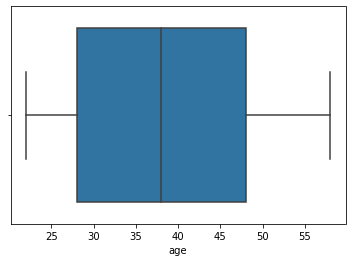

In [47]:
sns.boxplot(data['age'],orient='h')

# Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}


In [49]:
data['education'] = le.fit_transform(data['education'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}


In [50]:
data['marital-status'] = le.fit_transform(data['marital-status'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}


In [51]:
data['occupation'] = le.fit_transform(data['occupation'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}


In [52]:
data['relationship'] = le.fit_transform(data['relationship'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}


In [53]:
data['native-country'] = le.fit_transform(data['native-country'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, 'Dominican-Republic': 5, 'Ecuador': 6, 'El-Salvador': 7, 'England': 8, 'France': 9, 'Germany': 10, 'Greece': 11, 'Guatemala': 12, 'Haiti': 13, 'Holand-Netherlands': 14, 'Honduras': 15, 'Hong': 16, 'Hungary': 17, 'India': 18, 'Iran': 19, 'Ireland': 20, 'Italy': 21, 'Jamaica': 22, 'Japan': 23, 'Laos': 24, 'Mexico': 25, 'Nicaragua': 26, 'Outlying-US(Guam-USVI-etc)': 27, 'Peru': 28, 'Philippines': 29, 'Poland': 30, 'Portugal': 31, 'Puerto-Rico': 32, 'Scotland': 33, 'South': 34, 'Taiwan': 35, 'Thailand': 36, 'Trinadad&Tobago': 37, 'United-States': 38, 'Vietnam': 39, 'Yugoslavia': 40}


In [54]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39.0,6,9,4,0,1,White,Male,40.0,38,0
1,50.0,5,9,2,3,0,White,Male,24.0,38,0
2,38.0,3,11,0,5,1,White,Male,40.0,38,0
3,53.0,3,1,2,5,0,Black,Male,40.0,38,0
4,28.0,3,9,2,9,5,Black,Female,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
32554,53.0,3,12,2,3,0,White,Male,40.0,38,1
32555,22.0,3,15,4,10,1,White,Male,40.0,38,0
32556,27.0,3,7,2,12,5,White,Female,38.0,38,0
32558,58.0,3,11,6,0,4,White,Female,40.0,38,0


In [55]:
data = pd.get_dummies(data)
data.head()

,age,workclass,education,marital-status,occupation,relationship,hours-per-week,native-country,salary,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39.0,6,9,4,0,1,40.0,38,0,0,0,0,0,1,0,1
1,50.0,5,9,2,3,0,24.0,38,0,0,0,0,0,1,0,1
2,38.0,3,11,0,5,1,40.0,38,0,0,0,0,0,1,0,1
3,53.0,3,1,2,5,0,40.0,38,0,0,0,1,0,0,0,1
4,28.0,3,9,2,9,5,40.0,4,0,0,0,1,0,0,1,0


In [56]:
x=data.drop(['salary'],axis=1)
y=data['salary']

In [57]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# Modelling

#  Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [59]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [61]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.7676656585097608
Precision is:  0.7676656585097608
Recall is:  0.7676656585097608
F1 score is:  0.7676656585097607


In [62]:
from sklearn.metrics import classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion matrix
 [[5073  408]
 [1282  511]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      5481
           1       0.56      0.28      0.38      1793

    accuracy                           0.77      7274
   macro avg       0.68      0.61      0.62      7274
weighted avg       0.74      0.77      0.74      7274



# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
Y_predran = rf.predict(x_test)

In [64]:
print("Accuracy is: ", accuracy_score(y_test,Y_predran))
print("Precision is: ", precision_score(y_test,Y_predran,  average = 'micro'))
print("Recall is: ", recall_score(y_test,Y_predran,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,Y_predran, average = 'micro'))

Accuracy is:  0.8001099807533681
Precision is:  0.8001099807533681
Recall is:  0.8001099807533681
F1 score is:  0.8001099807533681


In [65]:
from sklearn.metrics import classification_report
print('Confusion matrix\n',confusion_matrix(y_test,Y_predran))
print(classification_report(y_test,Y_predran))

Confusion matrix
 [[4858  623]
 [ 831  962]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5481
           1       0.61      0.54      0.57      1793

    accuracy                           0.80      7274
   macro avg       0.73      0.71      0.72      7274
weighted avg       0.79      0.80      0.80      7274



# Descision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predtree = clf.predict(x_test)

In [67]:
print("Accuracy is: ", accuracy_score(y_test,y_predtree))
print("Precision is: ", precision_score(y_test,y_predtree,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_predtree,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_predtree, average = 'micro'))

Accuracy is:  0.7588671982403079
Precision is:  0.7588671982403079
Recall is:  0.7588671982403079
F1 score is:  0.7588671982403079


In [68]:
print('Confusion matrix\n',confusion_matrix(y_test,y_predtree))
print(classification_report(y_test,y_predtree))

Confusion matrix
 [[4640  841]
 [ 913  880]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5481
           1       0.51      0.49      0.50      1793

    accuracy                           0.76      7274
   macro avg       0.67      0.67      0.67      7274
weighted avg       0.76      0.76      0.76      7274



# Gradient Boosting Classifier

In [69]:
from sklearn.ensemble  import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [70]:
gb.fit(x_train, y_train)
y_predgrad=gb.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_predgrad))
print("Precision is: ", precision_score(y_test,y_predgrad,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_predgrad,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_predgrad, average = 'micro'))

Accuracy is:  0.8326917789386857
Precision is:  0.8326917789386857
Recall is:  0.8326917789386857
F1 score is:  0.8326917789386857


In [71]:
print('Confusion matrix\n',confusion_matrix(y_test,y_predgrad))
print(classification_report(y_test,y_predgrad))

Confusion matrix
 [[5041  440]
 [ 777 1016]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5481
           1       0.70      0.57      0.63      1793

    accuracy                           0.83      7274
   macro avg       0.78      0.74      0.76      7274
weighted avg       0.82      0.83      0.83      7274



# Fine Tunning

In [72]:
# Number of trees in random forest
n_estimators = [900]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [8]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [73]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
rf_model = RandomForestClassifier()

In [75]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [900]},
             verbose=2)

In [76]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 900}

In [77]:
print (f'Train Accuracy - : {rf_grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.827
Test Accuracy - : 0.824


In [78]:
# print prediction results 
predictions = rf_grid.predict(x_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      5481
           1       0.67      0.55      0.61      1793

    accuracy                           0.82      7274
   macro avg       0.77      0.73      0.75      7274
weighted avg       0.82      0.82      0.82      7274



In [79]:
gb = GradientBoostingClassifier(max_depth=3,learning_rate=.5,n_estimators=500)
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500)

In [80]:
y_pred=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8252680780863348


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5481
           1       0.66      0.60      0.63      1793

    accuracy                           0.83      7274
   macro avg       0.77      0.75      0.76      7274
weighted avg       0.82      0.83      0.82      7274



In [82]:
x_test['income']=predictions

In [83]:
x_test.head()

,age,workclass,education,marital-status,occupation,relationship,hours-per-week,native-country,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income
16803,39.0,1,12,2,9,0,40.0,38,0,0,0,0,1,0,1,1
8751,27.0,5,11,2,11,0,55.0,38,0,0,0,0,1,0,1,0
4842,58.0,3,11,5,11,1,32.0,38,0,0,0,0,1,1,0,0
17164,22.0,3,8,4,2,1,44.0,38,0,0,0,0,1,0,1,0
11346,50.0,3,11,2,9,0,40.0,38,0,0,1,0,0,0,1,0


In [84]:
import pickle

In [85]:
import pickle
with open('gb.pkl','wb') as file:
    pickle.dump(gb,file)
